In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from datetime import datetime
%matplotlib inline

In [2]:
# Import datset
df = pd.read_csv("loan_final313.csv")
display(df.head())
display(df.shape)

,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1077501,2011,01/12/2011,1012015,10.0,RENT,1,Low,24000,1,...,0,10.65,B,2,27.65,5861.071414,5000.00,0.00,162.87,munster
1,1077430,2011,01/12/2011,1042013,0.5,RENT,1,Low,30000,1,...,1,15.27,C,3,1.00,1008.710000,456.46,117.08,59.83,leinster
2,1077175,2011,01/12/2011,1062014,10.0,RENT,1,Low,12252,1,...,0,15.96,C,3,8.72,3003.653644,2400.00,0.00,84.33,cannught
3,1076863,2011,01/12/2011,1012015,10.0,RENT,1,Low,49200,1,...,0,13.49,C,3,20.00,12226.302210,10000.00,0.00,339.31,ulster
4,1075358,2011,01/12/2011,1012016,1.0,RENT,1,Low,80000,1,...,0,12.69,B,2,17.94,3242.170000,2233.10,0.00,67.79,ulster


(887379, 30)

In [3]:
# Choose 10 major features
df0 = df.iloc[:,[8, 4, 21, 10, 12, 20, 6, 16, 18, 23]]
display(df0.head())

,annual_inc,emp_length_int,interest_rate,loan_amount,term_cat,loan_condition_cat,home_ownership_cat,purpose_cat,interest_payment_cat,grade_cat
0,24000,10.0,10.65,5000,1,0,1,1,1,2
1,30000,0.5,15.27,2500,2,1,1,2,2,3
2,12252,10.0,15.96,2400,1,0,1,3,2,3
3,49200,10.0,13.49,10000,1,0,1,4,2,3
4,80000,1.0,12.69,3000,2,0,1,4,1,2


In [4]:
# Construct X and y
X1 = df0.iloc[:,:-1]
display(X1.head())
y1 = df0.iloc[:,-1]
display(y1.head())

,annual_inc,emp_length_int,interest_rate,loan_amount,term_cat,loan_condition_cat,home_ownership_cat,purpose_cat,interest_payment_cat
0,24000,10.0,10.65,5000,1,0,1,1,1
1,30000,0.5,15.27,2500,2,1,1,2,2
2,12252,10.0,15.96,2400,1,0,1,3,2
3,49200,10.0,13.49,10000,1,0,1,4,2
4,80000,1.0,12.69,3000,2,0,1,4,1


0    2
1    3
2    3
3    3
4    2
Name: grade_cat, dtype: int64

# Section 5.1.1 - Different scaling methods

In [5]:
# Min-max scaling
X1_scale = MinMaxScaler().fit_transform(X1)
display(pd.DataFrame(X1_scale, columns=X1.columns).head())

,annual_inc,emp_length_int,interest_rate,loan_amount,term_cat,loan_condition_cat,home_ownership_cat,purpose_cat,interest_payment_cat
0,0.002526,1.000000,0.225180,0.130435,0.0,0.0,0.0,0.000000,0.0
1,0.003158,0.000000,0.420363,0.057971,1.0,1.0,0.0,0.076923,1.0
2,0.001290,1.000000,0.449514,0.055072,0.0,0.0,0.0,0.153846,1.0
3,0.005179,1.000000,0.345163,0.275362,0.0,0.0,0.0,0.230769,1.0
4,0.008421,0.052632,0.311365,0.072464,1.0,0.0,0.0,0.230769,0.0


In [6]:
# Split dataset to the train and test set 
X_train, X_test, y_train, y_test = train_test_split(X1_scale, y1, random_state=0)
# Create an instance
knn = KNeighborsClassifier()
# Apply KNN to the training set
start=datetime.now()
knn.fit(X_train, y_train)
# Compare the predicted y and actual y
y_pred = knn.predict(X_test)
print (datetime.now()-start)
display(metrics.accuracy_score(y_test, y_pred))

0:15:59.003329


0.8393653226351732

* Since the computation cost is heavy, loop fucntion for various neighbors will be skipped.

In [7]:
# Standard scaling
X1_scale2 = StandardScaler().fit_transform(X1)
display(pd.DataFrame(X1_scale2, columns=X1.columns).head())

,annual_inc,emp_length_int,interest_rate,loan_amount,term_cat,loan_condition_cat,home_ownership_cat,purpose_cat,interest_payment_cat
0,-0.788703,1.126029,-0.592611,-1.156460,-0.654724,-0.286767,-1.1633,-1.627203,-0.95239
1,-0.695964,-1.582528,0.461735,-1.452829,1.527360,3.487148,-1.1633,-1.207238,1.04999
2,-0.970285,1.126029,0.619202,-1.464683,-0.654724,-0.286767,-1.1633,-0.787274,1.04999
3,-0.399202,1.126029,0.055515,-0.563724,-0.654724,-0.286767,-1.1633,-0.367309,1.04999
4,0.076856,-1.439973,-0.127055,-1.393555,1.527360,-0.286767,-1.1633,-0.367309,-0.95239


In [8]:
# Split dataset to the train and test set 
X_train, X_test, y_train, y_test = train_test_split(X1_scale2, y1, random_state=0)
# Create an instance
knn = KNeighborsClassifier()
# Apply KNN to the training set
start=datetime.now()
knn.fit(X_train, y_train)
# Compare the predicted y and actual y
y_pred = knn.predict(X_test)
print (datetime.now()-start)
display(metrics.accuracy_score(y_test, y_pred))

0:05:08.162368


0.8064459419865221

In [9]:
# Robust scaling
X1_scale3 = RobustScaler().fit_transform(X1)
display(pd.DataFrame(X1_scale3, columns=X1.columns).head())

,annual_inc,emp_length_int,interest_rate,loan_amount,term_cat,loan_condition_cat,home_ownership_cat,purpose_cat,interest_payment_cat
0,-0.911111,0.564286,-0.376812,-0.666667,0.0,0.0,-1.0,-1.666667,0.0
1,-0.777778,-0.792857,0.367150,-0.875000,1.0,1.0,-1.0,-1.333333,1.0
2,-1.172178,0.564286,0.478261,-0.883333,0.0,0.0,-1.0,-1.000000,1.0
3,-0.351111,0.564286,0.080515,-0.250000,0.0,0.0,-1.0,-0.666667,1.0
4,0.333333,-0.721429,-0.048309,-0.833333,1.0,0.0,-1.0,-0.666667,0.0


In [10]:
# Split dataset to the train and test set 
X_train, X_test, y_train, y_test = train_test_split(X1_scale3, y1, random_state=0)
# Create an instance
knn = KNeighborsClassifier()
# Apply KNN to the training set
start=datetime.now()
knn.fit(X_train, y_train)
# Compare the predicted y and actual y
y_pred = knn.predict(X_test)
print (datetime.now()-start)
display(metrics.accuracy_score(y_test, y_pred))

0:03:58.141010


0.7993824517117808

* Min-Max scaling is the best method in terms of prediciton accuracy.

# Section 5.1.2 - PCA with different components

In [11]:
# Min-max scaling
X1_scale2 = MinMaxScaler().fit_transform(X1)
display(pd.DataFrame(X1_scale2, columns=X1.columns).head())

,annual_inc,emp_length_int,interest_rate,loan_amount,term_cat,loan_condition_cat,home_ownership_cat,purpose_cat,interest_payment_cat
0,0.002526,1.000000,0.225180,0.130435,0.0,0.0,0.0,0.000000,0.0
1,0.003158,0.000000,0.420363,0.057971,1.0,1.0,0.0,0.076923,1.0
2,0.001290,1.000000,0.449514,0.055072,0.0,0.0,0.0,0.153846,1.0
3,0.005179,1.000000,0.345163,0.275362,0.0,0.0,0.0,0.230769,1.0
4,0.008421,0.052632,0.311365,0.072464,1.0,0.0,0.0,0.230769,0.0


In [12]:
# Conduct PCA with n = 2
# Create instances and fit the model
pca_model = PCA(n_components=2).fit(X1_scale2)
# Convert to a dataframe
X1_trans = pd.DataFrame(pca_model.transform(X1_scale2), columns=['pca1', 'pca2'])
display(X1_trans.head())

,pca1,pca2
0,-0.600901,0.152540
1,0.802580,-0.260676
2,0.203518,-0.439352
3,0.210642,-0.372705
4,-0.036304,0.402162


In [13]:
# Split dataset to the train and test set 
X_train, X_test, y_train, y_test = train_test_split(X1_trans, y1, random_state=0, test_size=0.25)
# Create an instance
knn = KNeighborsClassifier()
# Apply KNN to the training set
start=datetime.now()
knn.fit(X_train, y_train)
# Compare the predicted y and actual y
y_pred = knn.predict(X_test)
print (datetime.now()-start)
display(metrics.accuracy_score(y_test, y_pred))

0:00:03.223659


0.7106267889742839

In [14]:
# Min-max scaling
X1_scale = MinMaxScaler().fit_transform(X1)
display(pd.DataFrame(X1_scale, columns=X1.columns).head())

,annual_inc,emp_length_int,interest_rate,loan_amount,term_cat,loan_condition_cat,home_ownership_cat,purpose_cat,interest_payment_cat
0,0.002526,1.000000,0.225180,0.130435,0.0,0.0,0.0,0.000000,0.0
1,0.003158,0.000000,0.420363,0.057971,1.0,1.0,0.0,0.076923,1.0
2,0.001290,1.000000,0.449514,0.055072,0.0,0.0,0.0,0.153846,1.0
3,0.005179,1.000000,0.345163,0.275362,0.0,0.0,0.0,0.230769,1.0
4,0.008421,0.052632,0.311365,0.072464,1.0,0.0,0.0,0.230769,0.0


In [15]:
# Conduct PCA with n = 5
# Create instances and fit the model
pca_model = PCA(n_components=5).fit(X1_scale)
# Convert to a dataframe
X1_trans = pd.DataFrame(pca_model.transform(X1_scale), columns=['pca1', 'pca2', 'pca3', 'pca4', 'pca5'])
display(X1_trans.head())

,pca1,pca2,pca3,pca4,pca5
0,-0.600901,0.152540,-0.362126,-0.016072,-0.279143
1,0.802580,-0.260676,0.650297,0.861605,-0.450701
2,0.203518,-0.439352,-0.593714,-0.135197,-0.289843
3,0.210642,-0.372705,-0.580720,-0.135590,-0.097121
4,-0.036304,0.402162,0.833884,-0.006345,-0.552889


In [16]:
# Split dataset to the train and test set 
X_train, X_test, y_train, y_test = train_test_split(X1_trans, y1, random_state=0, test_size=0.25)
# Create an instance
knn = KNeighborsClassifier()
# Apply KNN to the training set
start=datetime.now()
knn.fit(X_train, y_train)
# Compare the predicted y and actual y
y_pred = knn.predict(X_test)
print (datetime.now()-start)
display(metrics.accuracy_score(y_test, y_pred))

0:00:05.891370


0.816304176339336

* Compare the result of  case when n=9 and n=5, while the different of accuracy is about 1%, the speed is 30X faster.
* Compare the result of  when n=2 and n=5, while the different of time is about 8 seconds, the accuracy is increased by more than 10%.
* Therefore, PCA with 5 components is a satisfactory choice in terms of both accuracy and speed, which will be used in the following examples.

# Section 5.1.3 - Different "weight" of samples

In [24]:
# Split dataset to the train and test set 
X_train, X_test, y_train, y_test = train_test_split(X1_trans, y1, random_state=0)
# Create an instance
knn = KNeighborsClassifier(weights='uniform') 
# Apply KNN to the training set
start=datetime.now()
knn.fit(X_train, y_train)
# Compare the predicted y and actual y
y_pred = knn.predict(X_test)
print (datetime.now()-start)
display(metrics.accuracy_score(y_test, y_pred))

0:00:12.198904


0.816304176339336

* In the "weight" parameter, 'distance' is better than 'uniform', so 'distance' will be used in the following examples.

# Section 5.1.4 - Different test size

In [18]:
# loop function to choose various test size
size_range = np.arange(0.1, 0.5, 0.05)
scores = []

for size in size_range:
    X_train, X_test, y_train, y_test = train_test_split(X1_trans, y1, random_state=0, test_size=size)
    knn = KNeighborsClassifier(weights='distance').fit(X_train, y_train)  
    y_pred = knn.predict(X_test)
    scores.append(round(metrics.accuracy_score(y_test, y_pred), 3))
    
print(scores)

[0.844, 0.842, 0.84, 0.838, 0.836, 0.834, 0.83, 0.827]


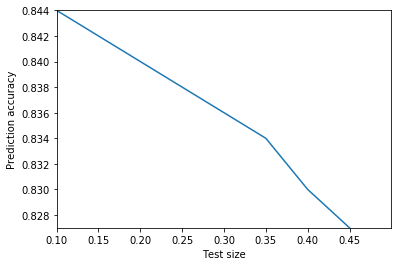

In [19]:
# Plot for various test size
plt.plot(size_range, scores)
plt.axis([0.1, 0.5, min(scores), max(scores)])
plt.xticks(size_range)
plt.xlabel('Test size')
plt.ylabel('Prediction accuracy')
plt.savefig('accu_testsize')

* Test size will be set as 0.1 in the following examples.

# Section 5.1.5 - Different number of k-NN neighbors

In [25]:
# loop function to choose various number of neighbors
k_range = range(1,21)
scores = []

for k in k_range:
    X_train, X_test, y_train, y_test = train_test_split(X1_trans, y1, random_state=0, test_size=0.1)
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance').fit(X_train, y_train)  
    y_pred = knn.predict(X_test)
    scores.append(round(metrics.accuracy_score(y_test, y_pred), 3))
    
print(scores)

[0.832, 0.832, 0.839, 0.842, 0.844, 0.846, 0.846, 0.847, 0.847, 0.848, 0.848, 0.848, 0.848, 0.849, 0.849, 0.849, 0.848, 0.848, 0.849, 0.848]


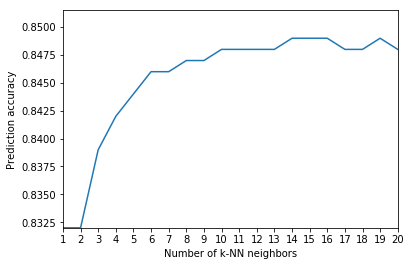

In [26]:
# Plot for various number of neighborhoods
plt.plot(k_range, scores)
plt.axis([1, 20, min(scores), max(scores)+0.0025])
plt.xticks(k_range)
plt.xlabel('Number of k-NN neighbors')
plt.ylabel('Prediction accuracy')
plt.savefig('num_knn.png')

# Section 5.1.6 - Different Type of distance

In [27]:
# Split dataset to the train and test set 
X_train, X_test, y_train, y_test = train_test_split(X1_trans, y1, random_state=0, test_size=0.1)
# Create an instance
knn = KNeighborsClassifier(weights='distance', p=1) # manhattan distance
# Apply KNN to the training set
start=datetime.now()
knn.fit(X_train, y_train)
# Compare the predicted y and actual y
y_pred = knn.predict(X_test)
print (datetime.now()-start)
display(metrics.accuracy_score(y_test, y_pred))

0:00:09.240920


0.846131307895152

In [28]:
# Split dataset to the train and test set 
X_train, X_test, y_train, y_test = train_test_split(X1_trans, y1, random_state=0, test_size=0.1)
# Create an instance
knn = KNeighborsClassifier(weights='distance') 
# Apply KNN to the training set
start=datetime.now()
knn.fit(X_train, y_train)
# Compare the predicted y and actual y
y_pred = knn.predict(X_test)
print (datetime.now()-start)
display(metrics.accuracy_score(y_test, y_pred))

0:00:09.512188


0.8443733237170096

# Optimal case

In [29]:
# Min-max scaling
X1_scale = MinMaxScaler().fit_transform(X1)

# Split dataset to the train and test set 
X_train, X_test, y_train, y_test = train_test_split(X1_scale, y1, test_size=0.1, random_state=0)
# Create an instance
knn = KNeighborsClassifier(weights='distance', n_neighbors=15, p=1)
# Apply KNN to the training set
start=datetime.now()
knn.fit(X_train, y_train)
# Compare the predicted y and actual y
y_pred = knn.predict(X_test)
print (datetime.now()-start)
display(metrics.accuracy_score(y_test, y_pred))

0:20:05.897223


0.8671144267393901

Summary
* Comparing vairous scaling methods, MinMax scaling performs better than robust scaling and the standard method according to the KNN accuracy.
* Comparing raw data, pca2 and pca5, pca5 has a better performance in terms of accuracy and speed.
* Comparing "uniform" and "distance", "distance" is better accroding to the accuracy.
* Comparing different size of test, smaller test size (bigger train size) leads to better accurcy.
* Comparing various number of neighborhoods, k=15 tends to achieve a highest accurary.
* Comparing "manhattan distance" and "euclidean", their performance are similar.

In conclusion, the best accuracy that KNN achieves in this experiment is around 86.7%, when sclaling = MinMax, pca(n=9), k=15, weight = "distance", test size=0.1, p=1 ("manhattan distance"). We may try another model (e.g. Decision Tree) to test if it can achieve a higher predicting accuracy on this dataset.